<a href="https://colab.research.google.com/github/Ferdiki/MachineLearning/blob/main/UTS2_G_231_21_0009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Pustaka
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
# Pustaka Visualisasi
import matplotlib.pyplot as plt
import matplotlib.mlab as elab
import seaborn as sn
# Integrasi Google Colab dan Pengunggahan File
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv


In [2]:
# panggil file
dataset = pd.read_csv('CarPrice_Assignment.csv')
# melihat jumlah baris dan jumlah kolom
dataset.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
# Melihat Informasi lebih detail mengenai struktur Data
dataset.shape

(205, 26)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# melihat statistik data
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# cek nilai yang hilang
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Visualisasi data untuk pemilihan variabel independen X
# untuk dapat menentukan lebih detail / akurat dalam pemilihan fitur dapat dilihat dari hubungan korelasi nya dengan function corr()
dataset.corr()

<ipython-input-7-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


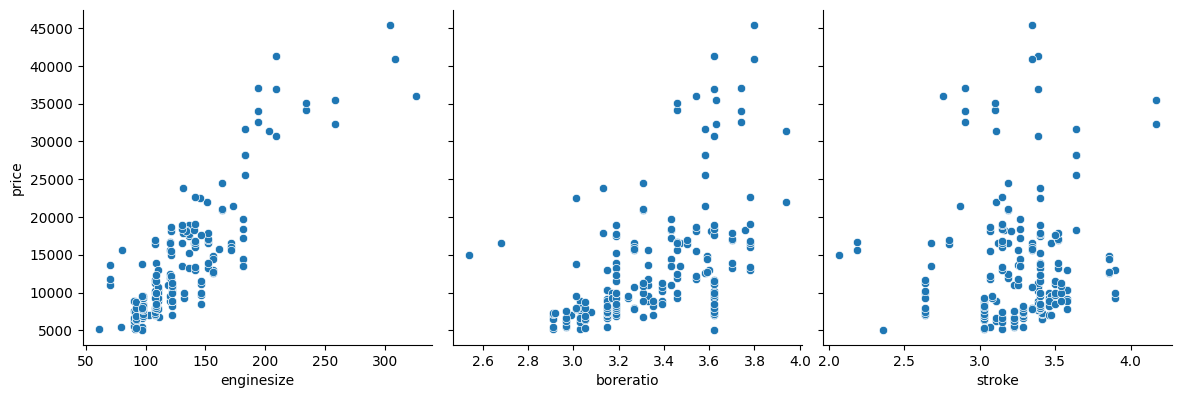

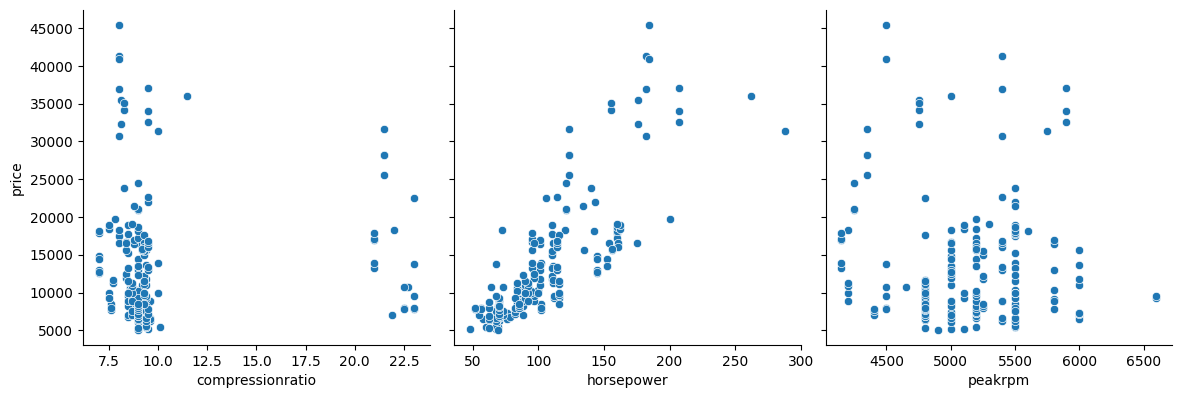

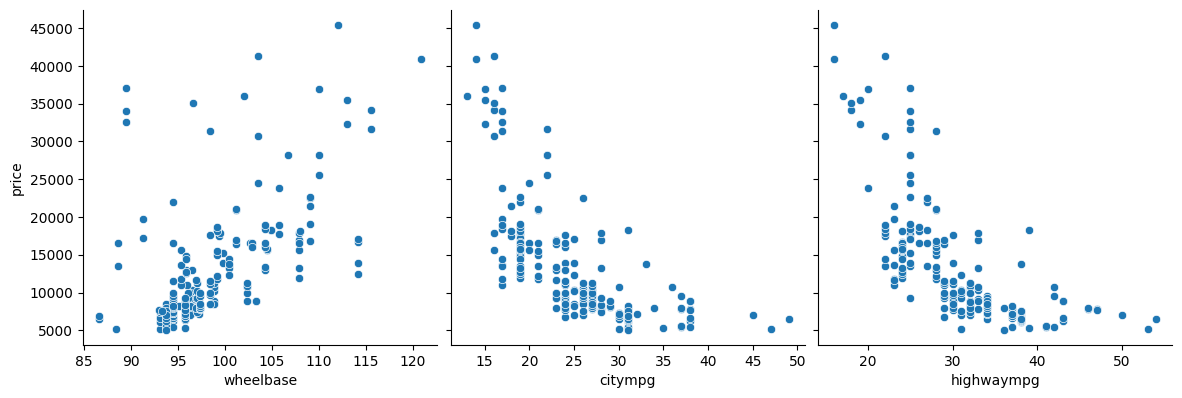

In [10]:
# Buat Visualisasi scater plot dari kolom
def pp(x,y,z):
    sn.pairplot(dataset, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter' )
    plt.show()

pp("enginesize", "boreratio", "stroke")
pp("compressionratio", "horsepower", "peakrpm")
pp("wheelbase", "citympg", "highwaympg")

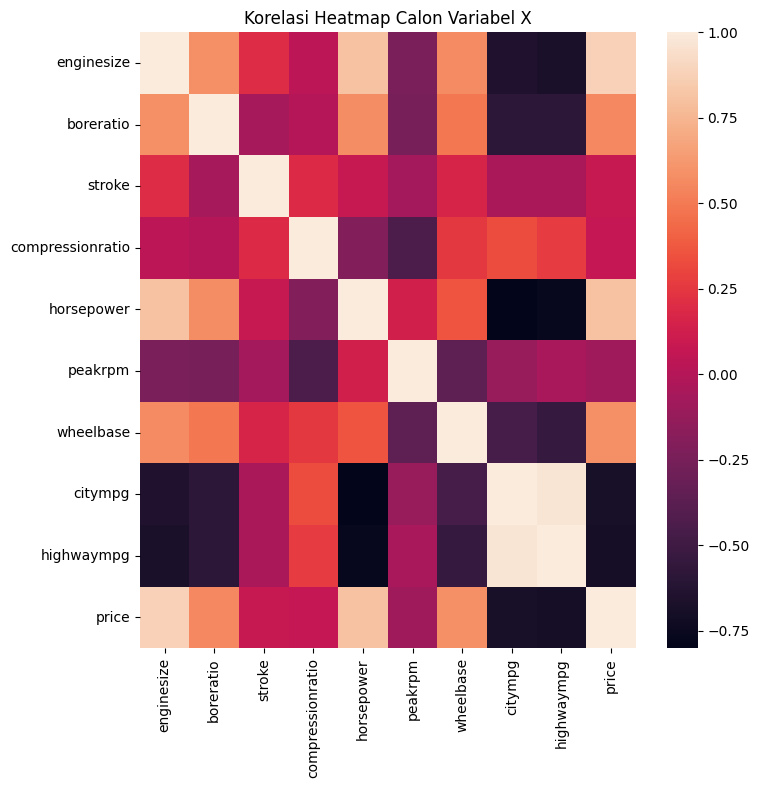

In [11]:
# Buat Visualisasi Heatmap dari kolom
plt.figure(figsize = (8,8))
data_fitur = dataset[['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'wheelbase', 'citympg', 'highwaympg','price']]
sn.heatmap(data_fitur.corr(),annot=False,fmt="f").set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

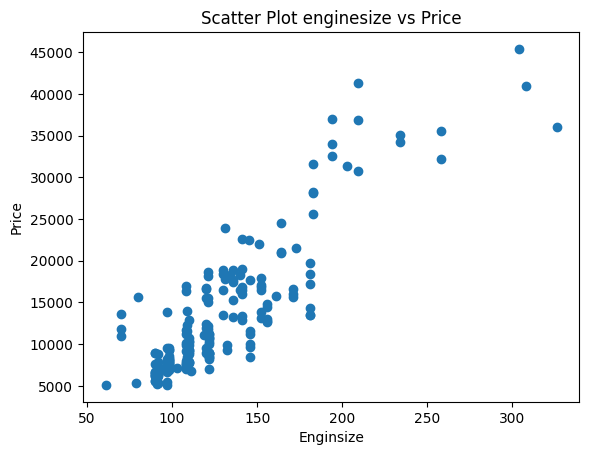

In [12]:
# Buat Visualisasi Scatter Plot antara calon variabel X(enginesize) dan y(price)
plt.scatter(dataset['enginesize'], dataset['price'])
plt.xlabel('Enginsize')
plt.ylabel('Price')
plt.title('Scatter Plot enginesize vs Price')
plt.show()

In [13]:
# definisi variabel X(enginesize) dan y(price):
# Pertama, buat variabel x dan y.
x = dataset['enginesize'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [14]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print('nilai mean var x: ', x_mean,'\n'
      'nilai mean var y: ', y_mean)

nilai mean var x:  126.90731707317073 
nilai mean var y:  13276.710570731706


In [16]:
# mencari nilai koefisien korelasi
import math
atas = sum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
correlation = atas/bawah
print('Nilai Correlation Coefficient: ', correlation)

Nilai Correlation Coefficient:  [0.8741448]


In [17]:
# slope
# Slope adalah tingkat kemiringan garis, intercept
# adalah jarak titik y pada garis dari titik 0
variance = sum((x - x_mean)**2)
covariance = sum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  [167.69841639]


In [18]:
# intercept
theta_0 = y_mean - (theta_1 * x_mean)
print('Nilai theta_1: ',theta_0)

Nilai theta_1:  [-8005.44553115]


In [19]:
# mencari nilai prediksi secara manual dan buatlah visualisasi scater plot nya
y_pred = theta_0 + (theta_1 * 130)

print(y_pred)

[13795.34859997]


Text(0.5, 1.0, 'Plot enginesize vs Price')

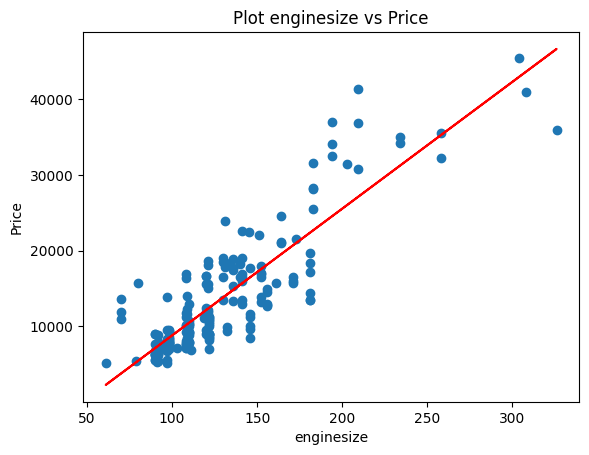

In [20]:
# visualisasi prediksi dengan scatter plot
y_pred = theta_0 + (theta_1 * x)
plt.scatter(dataset['enginesize'],dataset['price'])
plt.plot(x, y_pred, c='r')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Plot enginesize vs Price')

In [24]:
# Linier Regression dengan menggunakan library sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [30]:
# membuat model regresi
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# cari tau nilai slope/koefisien
print(model.coef_)
print(model.intercept_)

[[168.17363122]]
[-8037.06049611]


In [37]:
# cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya. Dan nilai korelasinya
model.score(x_test, y_test)

0.8068161903454086

In [38]:
print('Correlation: ', math.sqrt(model.score(x_test,y_test)))

Correlation:  0.8982294753265496


Text(0.5, 1.0, 'Plot enginesize vs Price')

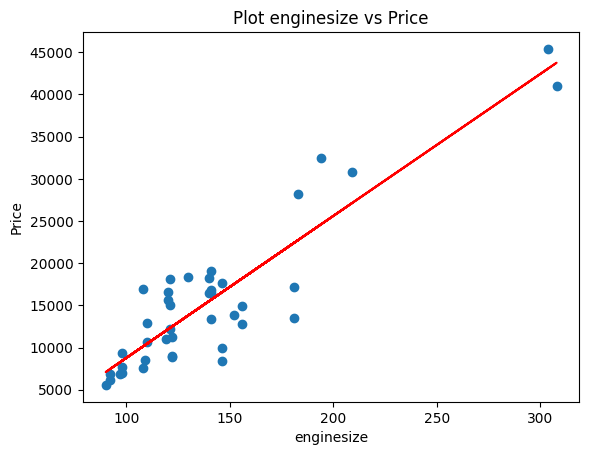

In [39]:
# visualisasi Regression Line menggunakan data testing.
y_prediksi = model.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Plot enginesize vs Price')

In [40]:
#Prediksi harga mobil dengan enginesize 130.
print('nilai prediksi harga dengan enginesize 100 : ',model.predict([[100]]))
print('nilai prediksi harga dengan enginesize 150 : ',model.predict([[150]]))
print('nilai prediksi harga dengan enginesize 200 : ',model.predict([[200]]))

nilai prediksi harga dengan enginesize 100 :  [[8780.30262568]]
nilai prediksi harga dengan enginesize 150 :  [[17188.98418658]]
nilai prediksi harga dengan enginesize 200 :  [[25597.66574748]]


In [41]:
np_table = np.concatenate((x_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['x_test','y_test','y_predict'])

In [42]:
new_dataframe

,x_test,y_test,y_predict
0,98.0,7738.0,8443.955363
1,109.0,8495.0,10293.865307
2,122.0,8845.0,12480.122512
3,98.0,9298.0,8443.955363
4,108.0,7603.0,10125.691675
5,122.0,11245.0,12480.122512
6,130.0,18420.0,13825.511562
7,140.0,16503.0,15507.247874
8,146.0,17669.0,16516.289662
9,181.0,17199.0,22402.366754


In [43]:
# Cetak nilai Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediksi))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediksi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi)))

Mean Absolute Error: 3123.611515387693
Mean Squared Error: 14882644.972928163
Root Mean Squared Error: 3857.8031278083854


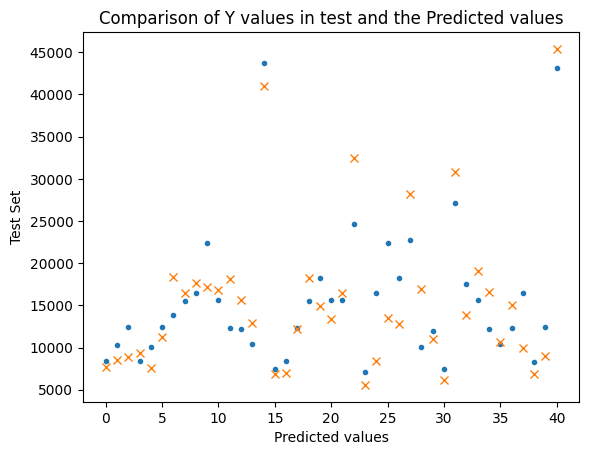

In [44]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_prediksi, '.', y_test, 'x')
plt.show()